In [104]:
import keras
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

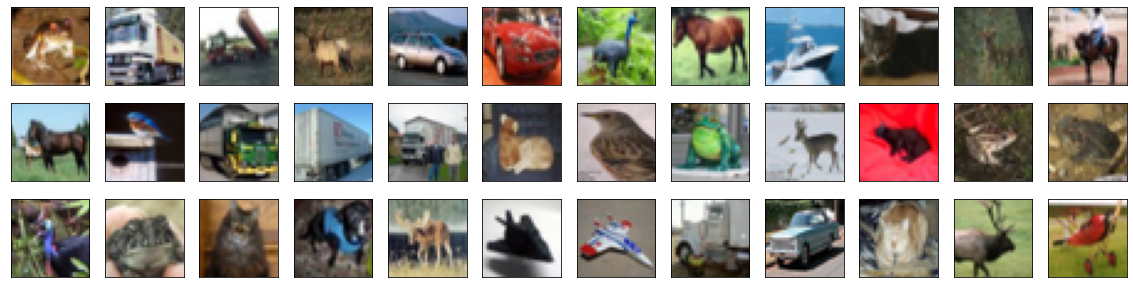

In [105]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 36
figure = plt.figure(figsize=(20, 5))
for index in range(SAMPLE_SIZE):
    ax = figure.add_subplot(3, 12, index + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_train[index]))

In [106]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [107]:

from keras import utils as np_utils

#==============================================#
# CODIFICACIÓN ONE-HOT ENCODE DE LAS ETIQUETAS #
#==============================================#

NUMBER_OF_CLASSES = len(np.unique(y_train))
y_train = keras.utils.np_utils.to_categorical(y_train, NUMBER_OF_CLASSES)
y_test = keras.utils.np_utils.to_categorical(y_test, NUMBER_OF_CLASSES)

#======================================================================#
# DIVIDIMOS EL CONJUNTO DE ENTRENAMIENTO EN ENTRENAMIENTO Y VALIDACIÓN #
#======================================================================#

split_point = 5000
(X_train, X_valid) = X_train[split_point:], X_train[:split_point]
(y_train, y_valid) = y_train[split_point:], y_train[:split_point]

#===================================#
# IMPRIME LA FORMA DE CADA CONJUNTO #
#===================================#

print(f'Shape of the training set: {X_train.shape}')
print(f'Shape of the test set: {X_test.shape}')
print(f'Shape of the validation set: {X_valid.shape}')

#====================================================#
# IMPRIMIMOS EL NUMERO DE ELEMENTOS IN CADA CONJUNTO #
#====================================================#

print(f'Number of training instances: {X_train.shape[0]}')
print(f'Number of test instances: {X_test.shape[0]}')
print(f'Number of validation instances: {X_valid.shape[0]}')

Shape of the training set: (45000, 32, 32, 3)
Shape of the test set: (10000, 32, 32, 3)
Shape of the validation set: (5000, 32, 32, 3)
Number of training instances: 45000
Number of test instances: 10000
Number of validation instances: 5000


In [108]:
from keras.preprocessing.image import ImageDataGenerator

data_generator_train = ImageDataGenerator(width_shift_range=0.1,
                                          height_shift_range=0.1,
                                          horizontal_flip=True)

data_generator_train.fit(X_train)

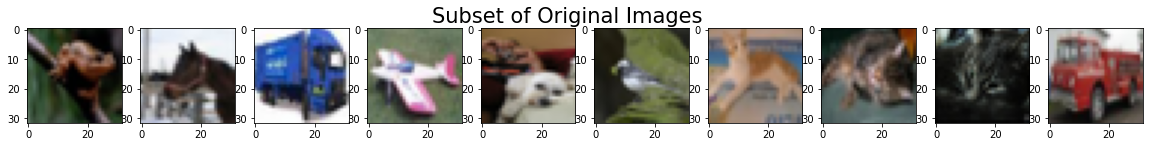

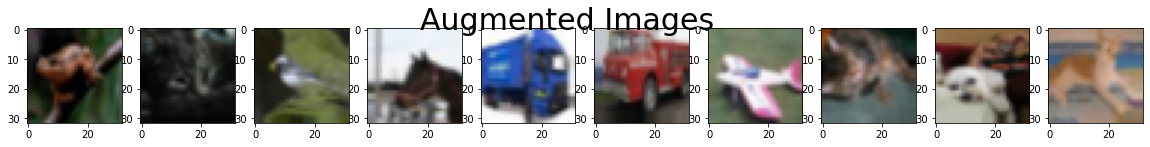

In [114]:
import matplotlib.pyplot as plt

SUBSET_SIZE = 10
X_train_subset = X_train[:SUBSET_SIZE]

# Visualize subset of original training data
figure = plt.figure(figsize=(20, 2))
for index in range(SUBSET_SIZE):
    ax = figure.add_subplot(1, SUBSET_SIZE, index + 1)
    ax.imshow(X_train_subset[index])
    
figure.suptitle('Subset of Original Images', fontsize=21)
plt.show()

# Visualize augmented images
figure = plt.figure(figsize=(20, 2))
for X_batch in data_generator_train.flow(X_train_subset, batch_size=SUBSET_SIZE):
    for index in range(SUBSET_SIZE):
        ax = figure.add_subplot(1, SUBSET_SIZE, index + 1)
        ax.imshow(X_batch[index])
        
    figure.suptitle('Augmented Images', fontsize=30)
    plt.show()
    break

Arquitectura del Modelo.

AQUI DEFINIMOS LA ARQUITECTURA DEL MODELO.

<img src="FLECHA.gif">

In [110]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

from keras import models
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

model = Sequential()
model.add(Convolution2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=2))
model.add(Convolution2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Convolution2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 32, 32, 16)        208       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 16, 16, 32)        2080      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 8, 8, 64)          8256      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 4, 4, 64)        

COMPILACIÓN DEL MODELO

In [111]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

ENTRENANDO EL MODELO

In [112]:
from keras.callbacks import ModelCheckpoint
from keras import models

def train_model(model, saved_model_output, batch_size, epochs, plot_history=True):
    checkpointer = ModelCheckpoint(filepath=saved_model_output, save_best_only=True)
    
    history = model.fit(
        data_generator_train.flow(X_train, y_train, 
                                  batch_size=batch_size), 
        epochs=epochs, 
        validation_data=(X_valid, y_valid), 
        callbacks=[checkpointer], 
        steps_per_epoch=X_train.shape[0] // batch_size,
        validation_steps=X_valid.shape[0] // batch_size)
    
    if plot_history:
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('Model accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['train', 'val'], loc='upper left')
        plt.show()

Epoch 1/20
175/175 [==============================] - 37s 208ms/step - loss: 1.8165 - accuracy: 0.3366 - val_loss: 1.4832 - val_accuracy: 0.4834
Epoch 2/20
175/175 [==============================] - 40s 230ms/step - loss: 1.5034 - accuracy: 0.4557 - val_loss: 1.3644 - val_accuracy: 0.5182
Epoch 3/20
175/175 [==============================] - 36s 204ms/step - loss: 1.4097 - accuracy: 0.4918 - val_loss: 1.2362 - val_accuracy: 0.5572
Epoch 4/20
175/175 [==============================] - 36s 207ms/step - loss: 1.3522 - accuracy: 0.5168 - val_loss: 1.2264 - val_accuracy: 0.5638
Epoch 5/20
175/175 [==============================] - 35s 202ms/step - loss: 1.3046 - accuracy: 0.5337 - val_loss: 1.2147 - val_accuracy: 0.5582
Epoch 6/20
175/175 [==============================] - 37s 209ms/step - loss: 1.2555 - accuracy: 0.5504 - val_loss: 1.1474 - val_accuracy: 0.5856
Epoch 7/20
175/175 [==============================] - 40s 229ms/step - loss: 1.2269 - accuracy: 0.5585 - val_loss: 1.0819 - val_ac

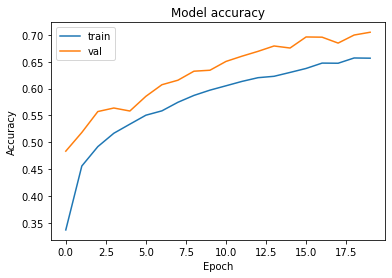

In [113]:

CNN_BEST_MODEL_OUTPUT = 'saved_models/cnn.cifar10.augmented.best.hdf5'

EPOCHS = 20
BATCH_SIZE = 256
train_model(model, CNN_BEST_MODEL_OUTPUT, BATCH_SIZE, EPOCHS)

In [115]:
model.load_weights(CNN_BEST_MODEL_OUTPUT)

score = model.evaluate(X_test, y_test)
print(f'CNN test accuracy: {100 * score[1]}%')

313/313 [==============================] - 4s 12ms/step - loss: 0.8639 - accuracy: 0.6987
CNN test accuracy: 69.87000107765198%
